In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import torch

# 02. Neural Network Classification with PyTorch
Classification is a problem of predecting whether something is one thing or anothr(there can be multiple things also)

In [3]:
from sklearn.datasets import make_circles
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 sample of y: {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y: [1 1 1 1 0]


In [6]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [7]:
# Make Dataframe of Circle data
Circles = pd.DataFrame({"X1":X[:, 0], 
                        "X2": X[:, 1],
                        "Label": y})

In [8]:
Circles.head(10)

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


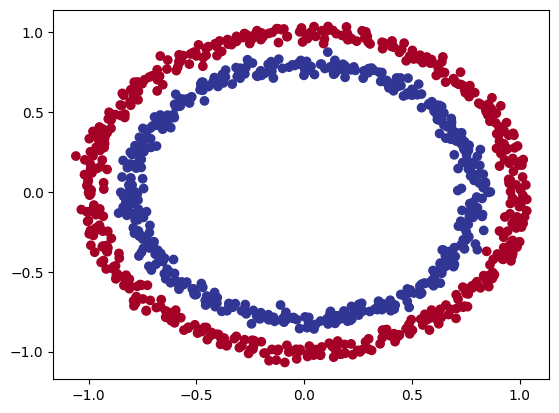

In [9]:
# Visualize
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);
# This will display a scatter plot with the first feature
# (X[:, 0]) on the x-axis and the second feature (X[:, 1])
# on the y-axis. Points will be colored according to the
# values in y, with the RdYlBu colormap.

### Note: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 Check inputs and output shapes

In [10]:
# View the first example of features and label
x_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {x_sample}\nand the same for y: {y_sample}")
print(f"Shapes for one sample of X: {x_sample.shape}\n and same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074]
and the same for y: 1
Shapes for one sample of X: (2,)
 and same for y: ()


In [11]:
print(x_sample)
print(y_sample)

[0.75424625 0.23148074]
1


### 1.2 Turn data into tensors and create train and test splits

In [12]:
type(X), type(y), X.dtype, y.dtype

(numpy.ndarray, numpy.ndarray, dtype('float64'), dtype('int64'))

In [13]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [14]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [16]:
torch.manual_seed(42)

In [17]:
# Split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [18]:
X_train.ndim, X_train.shape

(2, torch.Size([800, 2]))

In [19]:
len(X_train), len(X_test)

(800, 200)

In [20]:
len(y_train), len(y_test)

(800, 200)

## 2. Building a model
Let's builf a model to classify our blue and red dots

To do so we want to:
1. Setup device agnostic code so our code will run on an accelerator if there is one
2. Construct a model(by subclassing nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop

In [21]:
from torch import nn
# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Now we've setup device agnostic code, let's create a model
1. Subclass **nn.Module**
2. Create 2 **nn.linear()** layers that are capable of handling the shapes of our data
3. Defines **forward()** method that outlines the forward pass
4. Instatiate an instance of our model class and send it to the target **device**

In [22]:
# 1. Construct a model that subclass the nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # x-> layer_1 -> layer_2
    
# 4. Instantiate an instance of our model
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
device

'cpu'

In [24]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('layer_2.bias', tensor([-0.2060]))])

The number of hidden units we use in neural network layers is a **hyperparameter** and there's no set in stone value you have to use

In [25]:
# Make predections with model
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predections: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, shape: {y_test.shape}")
print(f"\n First 10 predections: \n {untrained_preds[:10]}")
print(f"\n First 10 test labels: \n {y_test[:10]}")

Length of predections: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200])

 First 10 predections: 
 tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]])

 First 10 test labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 2.1 Setup Loss and optimizer
This is binary classification problem so we use **binary cross entropy** as the loss function
And **stochastic gradient descent optimizer (SGD)** as a optimizer function

In [26]:
# Create a Loss function
# Loss_fn = nn.BCELoss() # no sigmoid loss
loss_fn = nn.BCEWithLogitsLoss()  # sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### Let's create an **evaluation metrice**
An evaluation metrices can be used to offer another perspective on how your model is going.

If loss function measures how wrong your model is, and evaluation metrices measures how right it is

There are several evaluation metrices that can be used for classification problems but let's start out with **accuracy**

**Accuracy** can be measured by dividing the total number of correct predections over the total number of predections

In [45]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred))*100
    return acc

In [46]:
## 3. Train Model
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0270],
        [ 0.0569],
        [-0.0433],
        [ 0.0469],
        [-0.0309]], grad_fn=<SliceBackward0>)

### To get our model's raw outputs(logits) into such a form, we can use the sigmoid activation function

In [47]:
# Use sigmoid on model logits
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.5068],
        [0.5142],
        [0.4892],
        [0.5117],
        [0.4923]], grad_fn=<SigmoidBackward0>)

If **y_preds_probs** >= 0.5, y=1(Class 1)

If **y_preds_probs** < 0.5, y=0(Class 0)

To turn our predections probabilities into predection labels, we can round the outputs of the sigmoid activation function

In [48]:
# Fid the predicted labels (round the predection probabilities)
y_preds = torch.round(y_preds_probs)
print(y_preds[:5])

#In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()   #reduce the dimension of tensor

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.]], grad_fn=<SliceBackward0>)
tensor([True, True, True, True, True])


tensor([1., 1., 0., 1., 0.], grad_fn=<SqueezeBackward0>)

In [49]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

## 3.2 Building a training and testing loop

In [51]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train , y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. OPtimizer zero grad
    optimizer.zero_grad()
    # It is used to clear the gradients of the model parameters before performing
    # the backpropagation step

    # 4. Loss Backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {float(loss):.5f}, Accuracy: {float(acc):.2f}% Test loss: {float(test_loss):.5f}, Test acc: {float(test_acc):.5f}")        

Epoch: 0 | Loss: 0.69298, Accuracy: 51.25% Test loss: 0.69484, Test acc: 45.50000
Epoch: 10 | Loss: 0.69298, Accuracy: 51.25% Test loss: 0.69482, Test acc: 45.50000
Epoch: 20 | Loss: 0.69298, Accuracy: 51.00% Test loss: 0.69481, Test acc: 45.50000
Epoch: 30 | Loss: 0.69298, Accuracy: 51.00% Test loss: 0.69480, Test acc: 45.50000
Epoch: 40 | Loss: 0.69298, Accuracy: 51.00% Test loss: 0.69480, Test acc: 45.50000
Epoch: 50 | Loss: 0.69298, Accuracy: 51.00% Test loss: 0.69479, Test acc: 45.50000
Epoch: 60 | Loss: 0.69298, Accuracy: 51.00% Test loss: 0.69478, Test acc: 45.50000
Epoch: 70 | Loss: 0.69298, Accuracy: 51.00% Test loss: 0.69477, Test acc: 45.50000
Epoch: 80 | Loss: 0.69298, Accuracy: 50.88% Test loss: 0.69477, Test acc: 45.50000
Epoch: 90 | Loss: 0.69298, Accuracy: 51.12% Test loss: 0.69476, Test acc: 45.50000


##### It looks like it went through the training and testing steps fine but the results don't seem to have moved too much. The accuracy barely moves above 50% on each data split

## 4. Make Predections and evaluate the model
From the metrices it looks like our model is random guessing
lets "Visualize, visualize, visualize"

In [54]:
import requests
from pathlib import Path
if Path("helper_functons.py").is_file():
    print("Helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

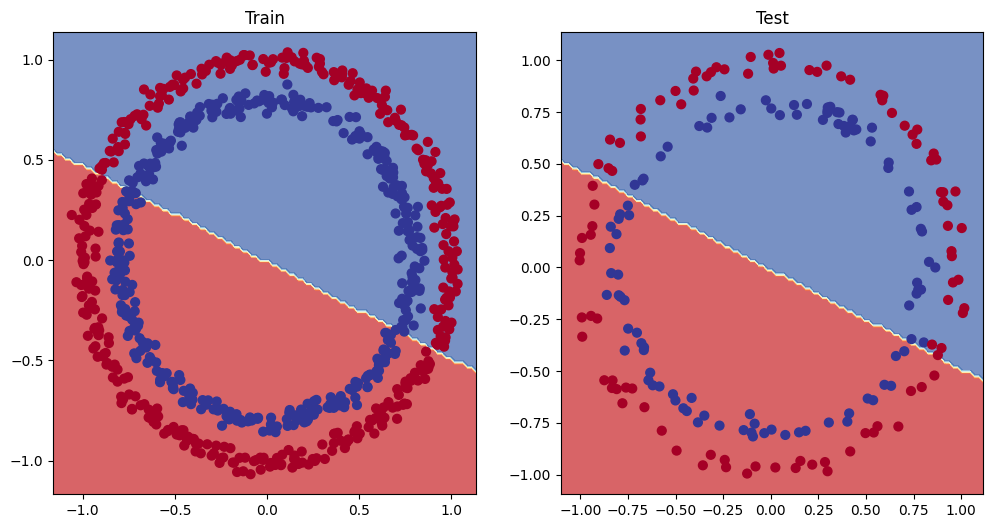

In [55]:
# Plot decision Boundary for trainig and testing sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

It seems loke we've found the cause of model's performance issue.

It's currently trying to split the red and blue dots using a straight line..

That explain the 50% accuracy. Since our data is circular,drawing a straight line can at best cut it down the middle

It's mean our model is **underfitting**, meaning it's not learning predective patterns from the data

## 5. Improving a model (from a model prespective)
Here are some ways we can use to improving our model

* **Add more layers**
* **Add more hidden units**
* **Fitting for longer(more epochs)**
* **Changing the activation functions**
* **Changing learning rate**
* **Change the loss function**
* **Use transfer learning**

### Let's see what happens if we add extra layer to our model and increase the number of hidden units from 5 to 10

In [59]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) #extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
    
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [60]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [61]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


### Our model trained for longer and with an extra layer but it still looks like it didn't learn any patterns better than random guessing

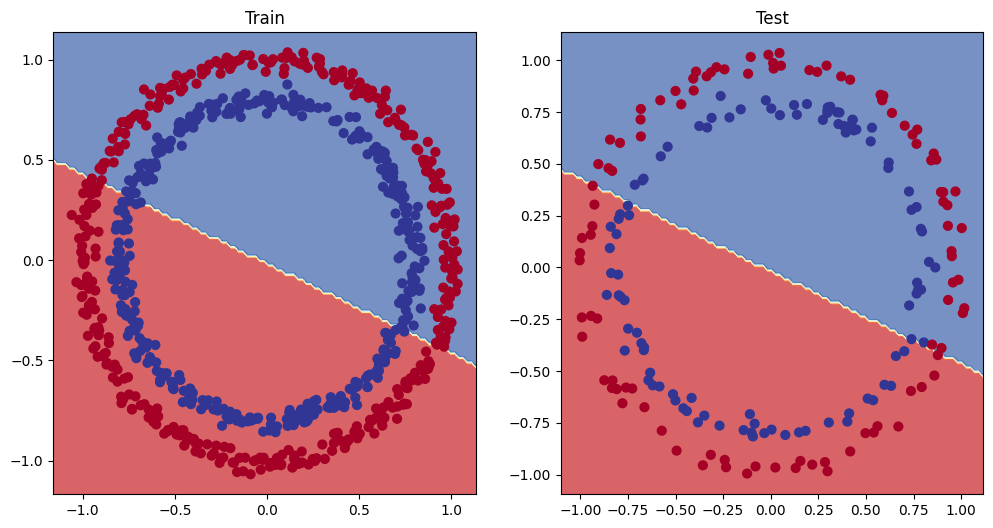

In [62]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 6. The missing peace: non linearity
We've seen our model can draw straight(linear) lines, thanks to it's linear layers. But we need non-linear lines

In [70]:
### 6.1 Building a model with non-linearity
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=8)
        self.layer_3 = nn.Linear(in_features=8, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


In [71]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [72]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70169, Accuracy: 50.00% | Test Loss: 0.70137, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69149, Accuracy: 55.00% | Test Loss: 0.69251, Test Accuracy: 48.00%
Epoch: 200 | Loss: 0.68906, Accuracy: 60.75% | Test Loss: 0.69106, Test Accuracy: 54.50%
Epoch: 300 | Loss: 0.68597, Accuracy: 55.62% | Test Loss: 0.68919, Test Accuracy: 51.00%
Epoch: 400 | Loss: 0.68187, Accuracy: 56.00% | Test Loss: 0.68672, Test Accuracy: 51.50%
Epoch: 500 | Loss: 0.67546, Accuracy: 56.25% | Test Loss: 0.68220, Test Accuracy: 52.50%
Epoch: 600 | Loss: 0.66491, Accuracy: 61.38% | Test Loss: 0.67438, Test Accuracy: 53.00%
Epoch: 700 | Loss: 0.64716, Accuracy: 73.88% | Test Loss: 0.65980, Test Accuracy: 70.00%
Epoch: 800 | Loss: 0.61399, Accuracy: 90.75% | Test Loss: 0.63100, Test Accuracy: 88.00%
Epoch: 900 | Loss: 0.55110, Accuracy: 98.50% | Test Loss: 0.57679, Test Accuracy: 96.50%


In [73]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

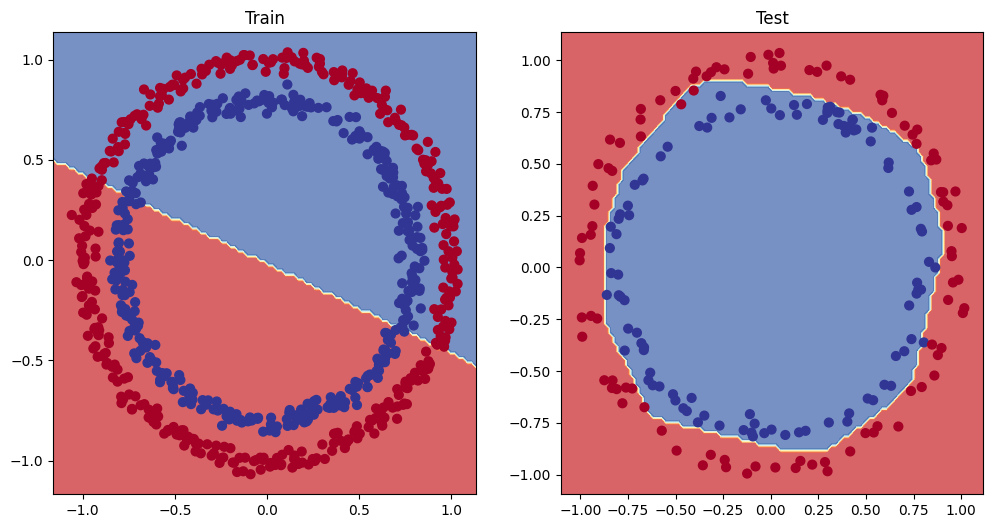

In [74]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity